In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [8]:
# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)


In [9]:
dataset.head()


,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [12]:
X_train.shape

(120, 4)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
X_train

array([[ 0.66323853,  0.29010569,  0.86320741,  1.42139758],
       [-0.93344682,  1.0153699 , -1.36873219, -1.20272103],
       [-1.05626878,  1.0153699 , -1.25427375, -0.80910324],
       [ 0.66323853, -0.43515853,  0.2909152 ,  0.10933828],
       [ 0.78606048, -0.19340379,  0.80597819,  1.02777979],
       [-0.31933707, -0.19340379,  0.17645676,  0.10933828],
       [-0.81062487,  1.0153699 , -1.31150297, -1.33392696],
       [ 0.66323853, -0.91866801,  0.86320741,  0.89657386],
       [-1.05626878,  0.29010569, -1.48319063, -1.33392696],
       [-0.07369317, -0.91866801,  0.06199832, -0.02186766],
       [-0.56498097,  0.77361516, -1.31150297, -1.0715151 ],
       [-0.07369317,  2.22414359, -1.48319063, -1.33392696],
       [-1.17909073,  0.04835095, -1.31150297, -1.46513289],
       [ 0.54041658, -0.67691327,  0.74874897,  0.37175014],
       [-0.44215902, -1.64393222,  0.0047691 , -0.15307359],
       [ 0.78606048, -0.19340379,  1.14935351,  1.29019165],
       [-0.56498097,  0.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [9]:
y_pred = classifier.predict(X_test)


In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[9 0 0]
 [0 8 1]
 [0 4 8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.67      0.89      0.76         9
 Iris-virginica       0.89      0.67      0.76        12

       accuracy                           0.83        30
      macro avg       0.85      0.85      0.84        30
   weighted avg       0.86      0.83      0.83        30



In [11]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Mean Error')

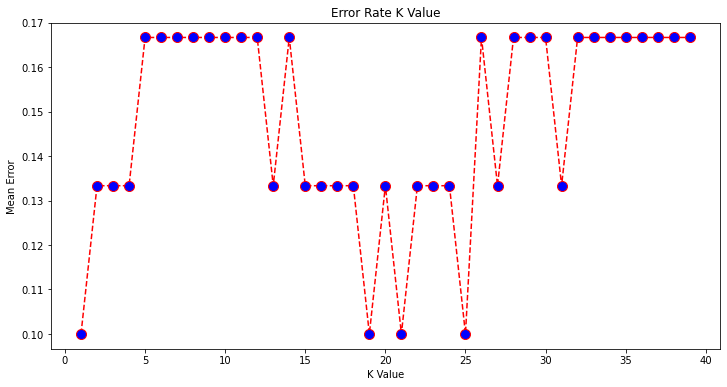

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
